✅ k = 1
   Training Accuracy: 0.943
   Test Accuracy:     0.667



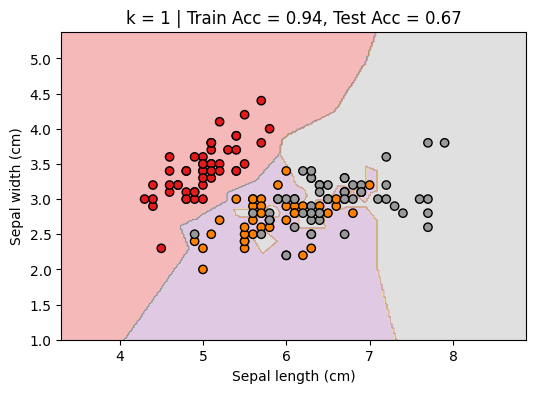

✅ k = 3
   Training Accuracy: 0.867
   Test Accuracy:     0.667



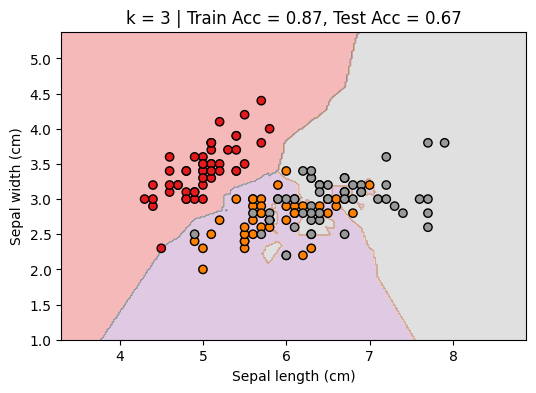

✅ k = 5
   Training Accuracy: 0.848
   Test Accuracy:     0.800



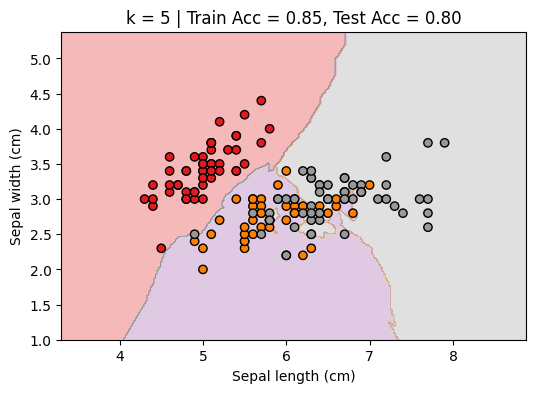

✅ k = 10
   Training Accuracy: 0.810
   Test Accuracy:     0.756



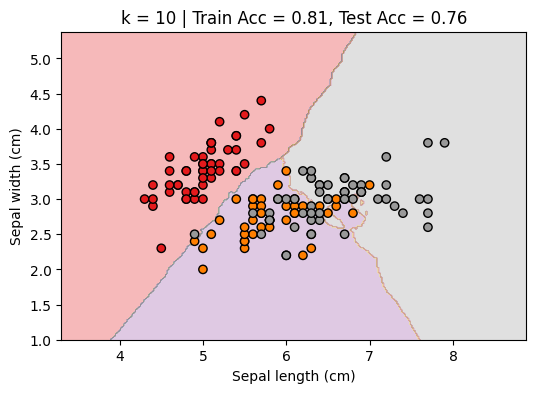

In [3]:
# 🌸 kNN Classification on Iris (Google Colab Ready)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1. Load dataset (use only 2 features: sepal length & sepal width)
iris = datasets.load_iris()
X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, k, train_acc, test_acc):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Set1)
    plt.xlabel("Sepal length (cm)")
    plt.ylabel("Sepal width (cm)")
    plt.title(f"k = {k} | Train Acc = {train_acc:.2f}, Test Acc = {test_acc:.2f}")
    plt.show()

# 2. Train models for different k values
k_values = [1, 3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)

    print(f"✅ k = {k}")
    print(f"   Training Accuracy: {train_acc:.3f}")
    print(f"   Test Accuracy:     {test_acc:.3f}\n")

    # 3. Plot decision boundaries
    plot_decision_boundary(knn, X, y, k, train_acc, test_acc)
